# Kelompok B - Data Mining - Correlation and Regression

1. Ainun Syafna Maharani (2006571186)

undefined. Auranissa Efrida P. (2006571192)

undefined. Daniel Rivaldo (2006534890)

undefined. Irba Alifa Taqiyya (2006571223)

undefined. Kamilia Firzanah (2006526144)

undefined. Kezia Emmanuela Bangun (2006572964)

undefined. Sachi Kirana Hera Singh (2006572926)

undefined. Nerissa Netanaya Setjiadi (1906375801)

In [62]:
import pandas as pd

file_ = 'data/Ashrae_Energy_Mean.csv'
try: #Loading Locally
    df = pd.read_csv(file_)
except Exception as err_:
    print(err_, " Trying to load data from GitHub.")
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataid/eLearning/master/data/Ashrae_Energy_Mean.csv
    df = pd.read_csv(file_)

print(df.shape)
df.head()

(1413, 12)


,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


site_id
air_temperature - Degrees Celsius
cloud_coverage - Portion of the sky covered in clouds, in oktas
dew_temperature - Degrees Celsius
precip_depth_1_hr - Millimeters
sea_level_pressure - Millibar/hectopascals
wind_direction - Compass direction (0-360)
wind_speed - Meters per second

## Pre Processing

In [64]:
#Memeriksa jumlah missing values
df.isnull().sum()

meter_reading            0
primary_use              0
square_feet              0
year_built             750
floor_count           1061
air_temperature          0
cloud_coverage          17
dew_temperature          0
precip_depth_1_hr      176
sea_level_pressure      89
wind_direction           0
wind_speed               0
dtype: int64

In [65]:
#Memeriksa tipe masing-masing variabel
df.dtypes

meter_reading         float64
primary_use            object
square_feet             int64
year_built            float64
floor_count           float64
air_temperature       float64
cloud_coverage        float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
dtype: object

In [66]:
#Mengubah tipe data primary_use dari object menjadi category
df["primary_use"]=df["primary_use"].astype('category')

In [44]:
#Memeriksa kembali tipe masing-masing variabel
df.dtypes

meter_reading          float64
primary_use           category
square_feet              int64
year_built             float64
floor_count            float64
air_temperature        float64
cloud_coverage         float64
dew_temperature        float64
precip_depth_1_hr      float64
sea_level_pressure     float64
wind_direction         float64
wind_speed             float64
dtype: object

In [67]:
#Drop duplicates
df.shape #(lihat shape)
df.drop_duplicates()
df.shape #recheck shape

(1413, 12)

### EDA

Text(0, 0.5, 'primary_use')

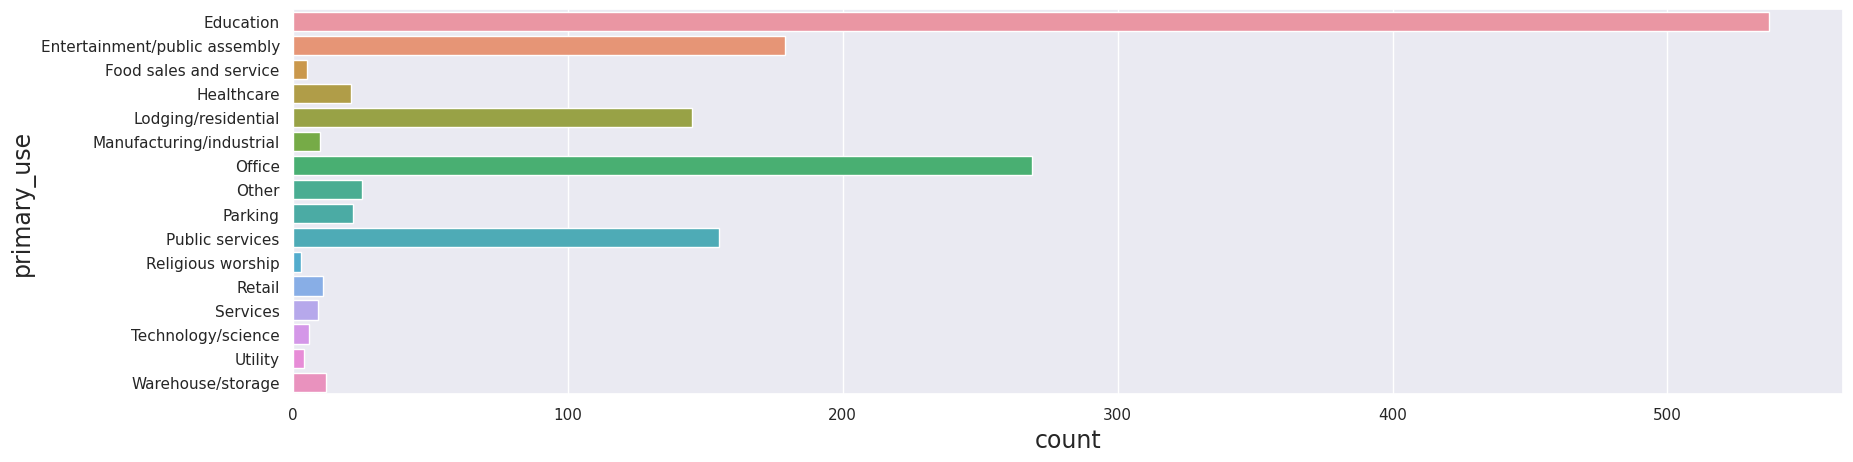

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
ax = sns.countplot(y='primary_use',data=df)
plt.xlabel("count",fontsize=17)
plt.ylabel("primary_use",fontsize=17)

In [69]:
df["primary_use"].value_counts()

Education                        537
Office                           269
Entertainment/public assembly    179
Public services                  155
Lodging/residential              145
Other                             25
Parking                           22
Healthcare                        21
Warehouse/storage                 12
Retail                            11
Manufacturing/industrial          10
Services                           9
Technology/science                 6
Food sales and service             5
Utility                            4
Religious worship                  3
Name: primary_use, dtype: int64

Penggunaan kategori gedung paling banyak adalah pada kategori Education sedangkan yang paling sedikit adalah untuk kategori Religious Worship.

In [9]:
rata_rata = df["meter_reading"].groupby(df["primary_use"]).mean()
print(rata_rata)

primary_use
Education                        266.690745
Entertainment/public assembly    123.170221
Food sales and service            96.372528
Healthcare                       309.476976
Lodging/residential              128.541808
Manufacturing/industrial          89.383883
Office                           170.117480
Other                             89.251035
Parking                           72.326071
Public services                   99.870828
Religious worship                  4.762342
Retail                           209.889978
Services                          93.846495
Technology/science               114.000695
Utility                          161.868339
Warehouse/storage                 50.796869
Name: meter_reading, dtype: float64


Dapat dilihat bahwa penggunaan listrik dalam kwh yang dilihat dalam rata-rata, didapat gedung dengan kategori healthcare menggunakan listrik yang paling besar. Sedangkan apabila dilihat dari jumlah gedung Healthcare, hanya terdapat 21 gedung berkategori ini. Hal ini menunjukan bahwa, gedung dengan kategori healthcare membutuhkan rata-rata penggunaan listrik yang banyak dan membutuhkan dana yang banyak pula. Penggunaan listrik yang banyak karena pada healthcare memiliki banyak alat-alat medis.

/tmp/ipykernel_1894/1897997570.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cloud_coverage'], color='orange')


<AxesSubplot: title={'center': 'Dist Plot Cloud Coverage\n'}, xlabel='cloud_coverage', ylabel='Density'>

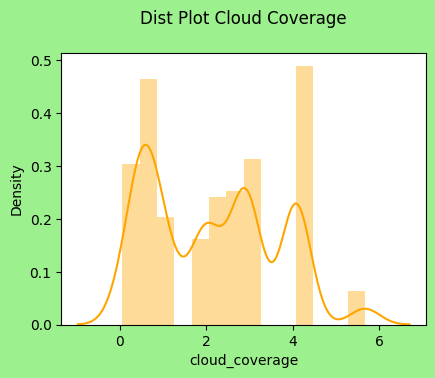

In [10]:
plt.figure(figsize=(16,12),facecolor='#9DF08E')

plt.subplot(3,3,1)
plt.title('Dist Plot Cloud Coverage\n', color='#000000')
sns.distplot(df['cloud_coverage'], color='orange')


/tmp/ipykernel_1894/2636395222.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['precip_depth_1_hr'], color='red')


<AxesSubplot: title={'center': 'Dist Plot precip_depth_1_hr\n'}, xlabel='precip_depth_1_hr', ylabel='Density'>

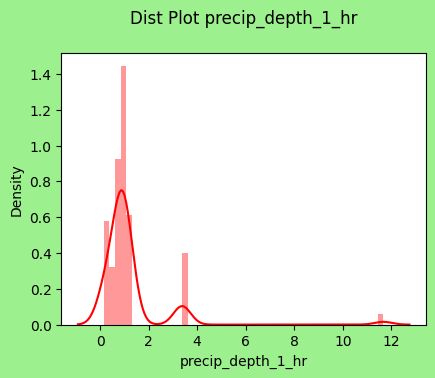

In [11]:
plt.figure(figsize=(16,12),facecolor='#9DF08E')

plt.subplot(3,3,1)
plt.title('Dist Plot precip_depth_1_hr\n', color='#000000')
sns.distplot(df['precip_depth_1_hr'], color='red')

/tmp/ipykernel_1894/3417192830.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sea_level_pressure'], color='green')


<AxesSubplot: title={'center': 'Dist Plot Sea Level Pressure \n'}, xlabel='sea_level_pressure', ylabel='Density'>

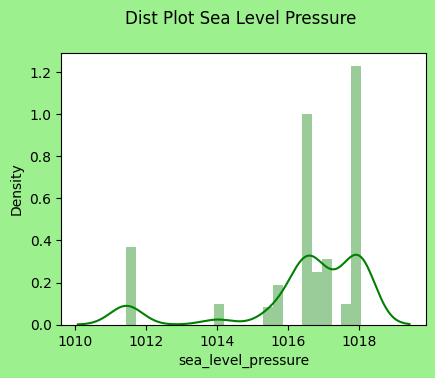

In [12]:
plt.figure(figsize=(16,12),facecolor='#9DF08E')

plt.subplot(3,3,1)
plt.title('Dist Plot Sea Level Pressure \n', color='#000000')
sns.distplot(df['sea_level_pressure'], color='green')

Dari hasil ketiga plot distribusi variabel bebas yang mempunyai missing value, dapat dilihat bahwa untuk variabel bebas cloud coverage distribusinya tidak condong, yang berarti missing valuenya harus modifikasi dengan nilai mean. Sedangkan untuk variabel bebas sea level pressure distribusinya condong ke kiri dan Precip Depth  distribusinya condong ke kanan yang berarti missing valuenya harus modifikasi dengan nilai median.

In [13]:
df['sea_level_pressure'].fillna(df['sea_level_pressure'].median(),inplace=True)
df['cloud_coverage'].fillna(df['cloud_coverage'].mean(),inplace=True)
df['precip_depth_1_hr'].fillna(df['precip_depth_1_hr'].median(),inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   meter_reading       1413 non-null   float64 
 1   primary_use         1413 non-null   category
 2   square_feet         1413 non-null   int64   
 3   year_built          663 non-null    float64 
 4   floor_count         352 non-null    float64 
 5   air_temperature     1413 non-null   float64 
 6   cloud_coverage      1396 non-null   float64 
 7   dew_temperature     1413 non-null   float64 
 8   precip_depth_1_hr   1237 non-null   float64 
 9   sea_level_pressure  1324 non-null   float64 
 10  wind_direction      1413 non-null   float64 
 11  wind_speed          1413 non-null   float64 
dtypes: category(1), float64(10), int64(1)
memory usage: 123.6 KB


## Korelasi dan Regresi

In [15]:
import seaborn as sns

                    meter_reading  square_feet  year_built  floor_count  \
meter_reading            1.000000     0.583356    0.144270     0.446672   
square_feet              0.583356     1.000000    0.110153     0.537979   
year_built               0.144270     0.110153    1.000000     0.100369   
floor_count              0.446672     0.537979    0.100369     1.000000   
air_temperature         -0.034220    -0.022617    0.302401    -0.349697   
cloud_coverage           0.013167    -0.043972    0.120421    -0.174242   
dew_temperature         -0.017421    -0.076130    0.268517    -0.294305   
precip_depth_1_hr        0.389051     0.139779   -0.015615     0.297650   
sea_level_pressure      -0.009158    -0.076230   -0.025223    -0.378594   
wind_direction          -0.001357    -0.075351   -0.357199     0.404375   
wind_speed              -0.073006    -0.125481   -0.202875    -0.046254   

                    air_temperature  cloud_coverage  dew_temperature  \
meter_reading             -

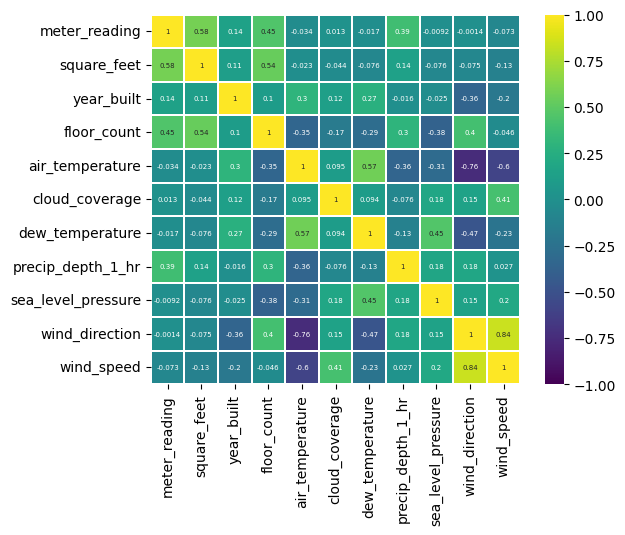

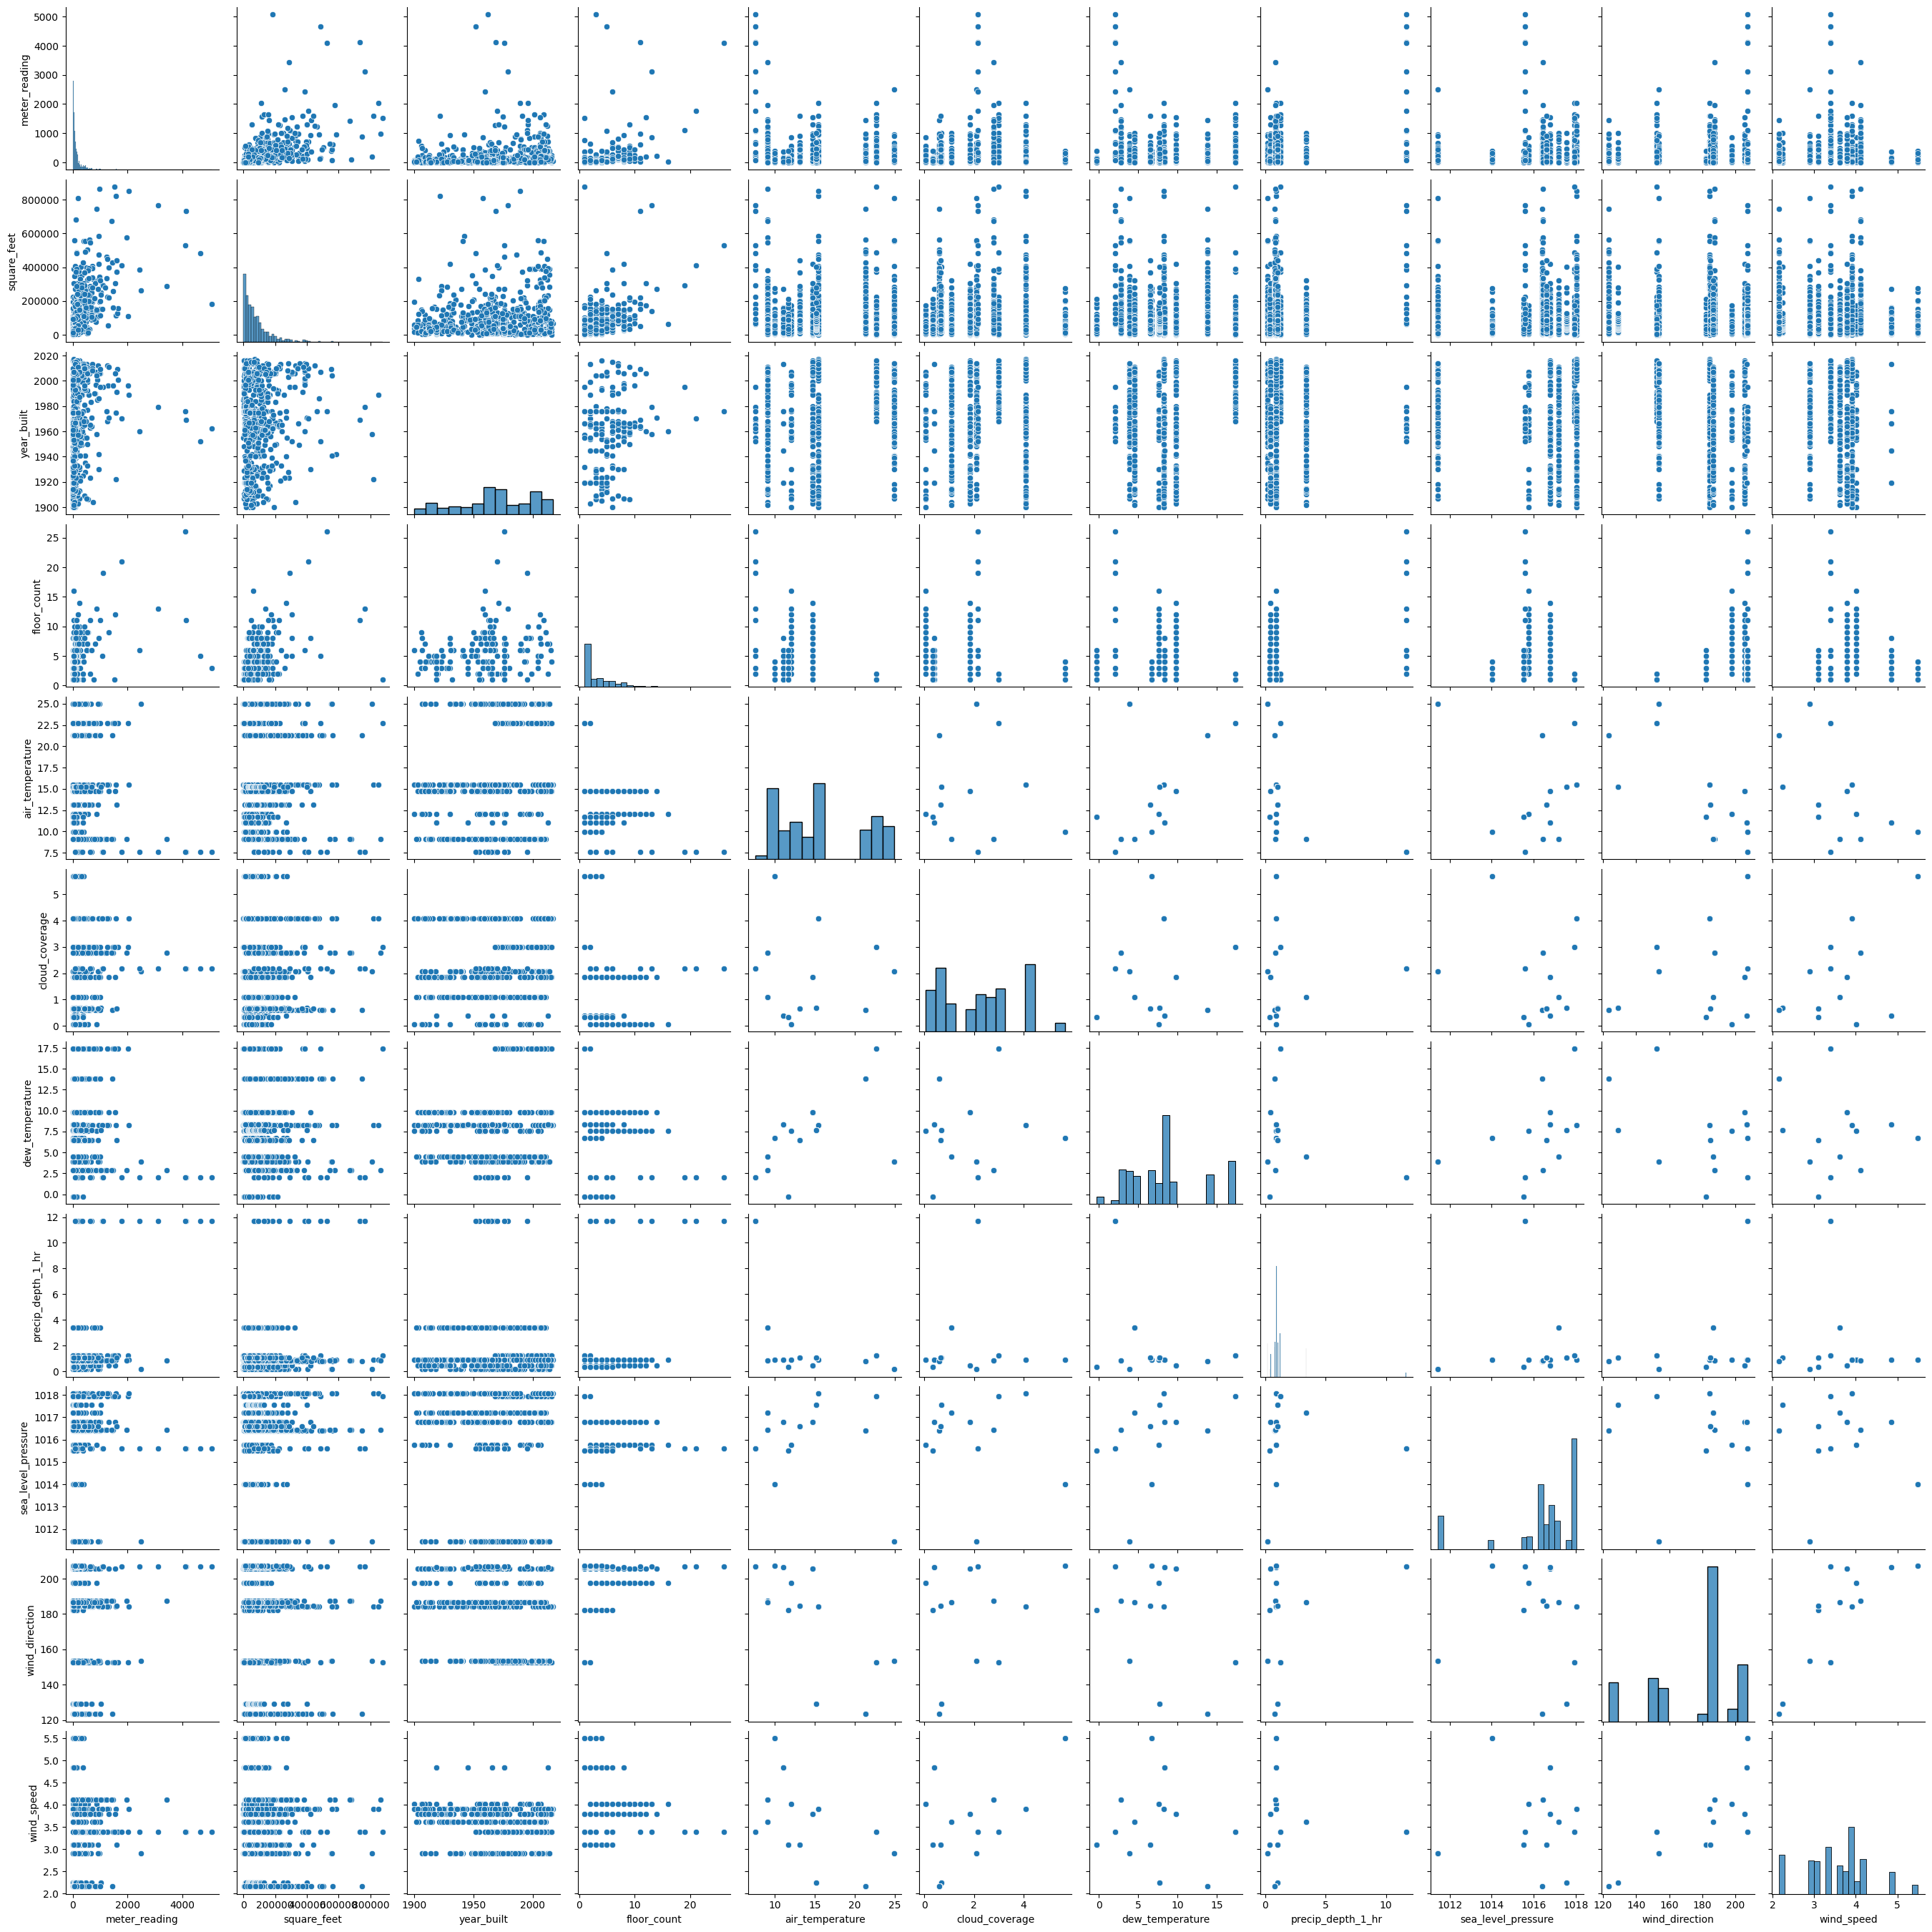

In [16]:
print(df.corr())
sns.heatmap(df.corr(), cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={'size':5}, square=True)
p = sns.pairplot(df)

Dari hasil di atas yang memiliki nilai korelasi 0.84 antara wind_speed dan wind_direction menunjukkan bahwa terdapat korelasi linier positif yang kuat antara keduanya dan termasuk skala koefisien korelasi kuat. Ada kecenderungan bahwa wind_direction tinggi lebih berkorelasi dengan wind_speed tinggi dibandingkan dengan wind_speed rendah.

Dari hasil di atas yang memiliki nilai korelasi -0.76 antara wind_direction dan air_temperature menunjukkan bahwa terdapat korelasi linier negatif yang kuat antara keduanya dan termasuk skala koefisien korelasi kuat. Ada kecenderungan bahwa wind_direction tinggi tidak berkaitan dengan air_temperatur yang lebih tinggi dibandingkan wind_speed rendah.

Dari hasil di atas yang memiliki nilai korelasi -0.6 antara wind_speed dan air_temperature menunjukkan bahwa terdapat korelasi linier negatif yang kuat antar keduanya dan termasuk skala koefisien korelasi kuat. Ada kecenderungan bahwa wind_speed tinggi tidak berkaitan dengan air_temperatur yang lebih tinggi dibandingkan wind_speed rendah.

Warning!

Korelasi tidak sama dengan sebab akibat. Perhatikan interpretasi di atas. Hanya suatu tren atau kecenderungan. Sampai sini kita memahami bahwa keduanya berhubungan, tetapi seperti apa hubungannya kita masih belum bisa ketahui (lewat korelasi). Itulah mengapa kita perlu Model Regresi.

### Model Regresi

In [17]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np
plt.style.use('bmh'); sns.set()

In [18]:
!pip install statsmodels

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [46]:
# Fitting model Regresi Sederhana
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats

lm1 = smf.ols("meter_reading ~ square_feet + air_temperature + cloud_coverage + dew_temperature + precip_depth_1_hr + sea_level_pressure + wind_direction + wind_speed", data=df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          meter_reading   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     90.81
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          5.25e-118
Time:                        09:15:28   Log-Likelihood:                -8351.8
No. Observations:                1220   AIC:                         1.672e+04
Df Residuals:                    1211   BIC:                         1.677e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -5.141e+04   2.21e+04     -2.330      0.020   -9.47e+04   -8113.623
square_feet            0.0016   5.98e-05     26.105      0.000       0.001       0.002
air_temperature       27.7956     10.063      2.762      0.006       8.053      47.538
cloud_coverage      -107.2283     30.535     -3.512      0.000    -167.135     -47.322
dew_temperature      -13.0796      8.557     -1.529      0.127     -29.868       3.709
precip_depth_1_hr    -17.8184     11.801     -1.510      0.131     -40.971       5.334
sea_level_pressure    49.9227     21.569      2.315      0.021       7.606      92.239
wind_direction        -3.2334      1.023     -3.159      0.002      -5.241      -1.225
wind_speed           340.8493     81.537      4.180      0.000     180.880     500.819
==============================================================================
Omnibus:                     1101.545   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72077.873
Skew:                           3.881   Prob(JB):                         0.00
Kurtosis:                      39.847   Cond. No.                     4.95e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.95e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Berdasarkan output di atas terlihat beberapa variabel yang tidak signifikan, yaitu variabel air_temperature, sea_level_pressure, dan wind_speed. Sehingga, kami mencoba untuk membuat model baru (lm2) dengan menghapus variabel yang paling tidak signifikan yaitu air_temperature. 

In [47]:
lm2 = smf.ols("meter_reading ~ square_feet + cloud_coverage + dew_temperature + precip_depth_1_hr + sea_level_pressure + wind_direction + wind_speed", data=df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          meter_reading   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     102.1
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          2.18e-117
Time:                        09:15:34   Log-Likelihood:                -8355.6
No. Observations:                1220   AIC:                         1.673e+04
Df Residuals:                    1212   BIC:                         1.677e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           7679.7601   5434.896      1.413      0.158   -2983.088    1.83e+04
square_feet            0.0015   5.93e-05     25.910      0.000       0.001       0.002
cloud_coverage       -30.3206     12.569     -2.412      0.016     -54.980      -5.661
dew_temperature        9.7665      2.200      4.440      0.000       5.451      14.082
precip_depth_1_hr     -6.0042     11.029     -0.544      0.586     -27.642      15.633
sea_level_pressure    -7.7674      5.400     -1.438      0.151     -18.361       2.826
wind_direction        -1.6092      0.840     -1.916      0.056      -3.257       0.039
wind_speed           152.3573     44.749      3.405      0.001      64.564     240.151
==============================================================================
Omnibus:                     1104.637   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70546.872
Skew:                           3.910   Prob(JB):                         0.00
Kurtosis:                      39.423   Cond. No.                     1.22e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Dari hasil output di atas, dapat dilihat bahwa semua variabel sudah signifikan. Sehingga, model lm2 dapat dikatakan sudah cukup baik. Namun, kami mencoba untuk membuat model baru (lmd1) dengan memasukkan dummy variabel ke dalam variabel primary_use yang diharapkan dapat menghasilkan model yang lebih baik daripada lm2.

In [70]:
lmd1 = smf.ols("meter_reading ~ C(primary_use) + square_feet + cloud_coverage + dew_temperature + precip_depth_1_hr + sea_level_pressure + wind_direction + wind_speed", data=df).fit()
lmd1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          meter_reading   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     43.28
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          3.91e-135
Time:                        09:38:08   Log-Likelihood:                -8281.4
No. Observations:                1220   AIC:                         1.661e+04
Df Residuals:                    1197   BIC:                         1.673e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                        7738.1699   5214.828      1.484      0.138   -2493.050     1.8e+04
C(primary_use)[T.Entertainment/public assembly]   -88.6908     20.350     -4.358      0.000    -128.616     -48.766
C(primary_use)[T.Food sales and service]           -7.1005     97.799     -0.073      0.942    -198.976     184.775
C(primary_use)[T.Healthcare]                       41.0976     49.878      0.824      0.410     -56.761     138.956
C(primary_use)[T.Lodging/residential]             -89.6514     21.988     -4.077      0.000    -132.790     -46.513
C(primary_use)[T.Manufacturing/industrial]        -89.2471     83.955     -1.063      0.288    -253.962      75.468
C(primary_use)[T.Office]                          -48.7870     18.373     -2.655      0.008     -84.834     -12.740
C(primary_use)[T.Other]                           -93.3699     46.320     -2.016      0.044    -184.247      -2.492
C(primary_use)[T.Parking]                        -511.9078     49.104    -10.425      0.000    -608.247    -415.569
C(primary_use)[T.Public services]                 -95.0943     21.941     -4.334      0.000    -138.141     -52.048
C(primary_use)[T.Religious worship]               -67.7827    125.932     -0.538      0.591    -314.854     179.289
C(primary_use)[T.Retail]                           51.5819     78.133      0.660      0.509    -101.711     204.874
C(primary_use)[T.Services]                       -360.3890     73.959     -4.873      0.000    -505.494    -215.284
C(primary_use)[T.Technology/science]              -64.9580     97.930     -0.663      0.507    -257.092     127.176
C(primary_use)[T.Utility]                          47.8837    109.365      0.438      0.662    -166.684     262.452
C(primary_use)[T.Warehouse/storage]              -122.4857     63.891     -1.917      0.055    -247.837       2.865
square_feet                                         0.0016   5.85e-05     28.066      0.000       0.002       0.002
cloud_coverage                                    -38.7164     12.765     -3.033      0.002     -63.760     -13.673
dew_temperature                                    10.4297      2.126      4.906      0.000       6.259      14.601
precip_depth_1_hr                                  -8.9408     10.714     -0.834      0.404     -29.962      12.080
sea_level_pressure                                 -7.7722      5.182     -1.500      0.134     -17.939       2.394
wind_direction                                     -2.9646      0.849     -3.491      0.000      -4.631      -1.298
wind_speed                                        223.3588     45.323      4.928      0.000     134.436     312.281
===================================================================

Berdasarkan output di atas diperoleh bahwa banyak dummy variable yang tidak signifikan. Dengan demikian, kami memutuskan untuk menggunakan model lm2.

In [49]:
def forward_selected(data, response):
    """Linear model designed by forward selection.
    https://planspace.org/20150423-forward_selection_with_statsmodels/
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response, ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [50]:
model = forward_selected(df, 'meter_reading')

print(model.model.formula)
print(model.rsquared_adj)

meter_reading ~ square_feet + floor_count + precip_depth_1_hr + 1
0.711054556712897


In [51]:
#Interpretasi koefisien
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     166.7
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           4.85e-54
Time:                        09:15:55   Log-Likelihood:                -1494.1
No. Observations:                 203   AIC:                             2996.
Df Residuals:                     199   BIC:                             3009.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -176.0339     38.20

Pada kode di atas, kami melakukan forward selection pada model. Namun, pada output dapat kita lihat bahwa beberapa variabel tidak signifikan sehingga kami memutuskan untuk tidak menggunakan metode forward selection.

### Kesimpulan

Beberapa kesimpulan yang didapatkan adalah sebagai berikut:

1. Setelah dilakukan data pre-processing, didapat variabel yang mempunyai banyak missing values yaitu variabel year_built, floor_count, precip_depth_1_hr, sea_level_pressure , cloud_coverage. Kemudian, dilakukan plot distribusi untuk ketiga variabel yang paling sedikit mempunyai missing value untuk menentukan cara untuk mengisi missing value. Dari hasil ketiga plot distribusi variabel bebas yang mempunyai missing value, dapat dilihat bahwa untuk variabel bebas cloud coverage distribusinya tidak condong, yang berarti missing valuenya harus modifikasi dengan nilai mean. Sedangkan untuk variabel bebas sea level pressure distribusinya condong ke kiri dan Precip Depth  distribusinya condong ke kanan yang berarti missing valuenya harus modifikasi dengan nilai median.

undefined. Penggunaan kategori gedung paling banyak adalah pada kategori Education sedangkan yang paling sedikit adalah untuk kategori Religious Worship. Kemudian, penggunaan listrik dalam kwh yang dilihat dalam rata-rata, didapat gedung dengan kategori healthcare menggunakan listrik yang paling besar. Sedangkan apabila dilihat dari jumlah gedung Healthcare, hanya terdapat 21 gedung berkategori ini. Hal ini menunjukan bahwa, gedung dengan kategori healthcare membutuhkan rata-rata penggunaan listrik yang banyak dan membutuhkan dana yang banyak pula. Penggunaan listrik yang banyak karena pada healthcare memiliki banyak alat-alat medis.

undefined. Dari hasil di atas yang memiliki nilai korelasi 0.84 antara wind_speed dan wind_direction menunjukkan bahwa terdapat korelasi linier positif yang kuat antara keduanya dan termasuk skala koefisien korelasi kuat. Ada kecenderungan bahwa wind_direction tinggi lebih berkorelasi dengan wind_speed tinggi dibandingkan dengan wind_speed rendah.

undefined. Dari hasil di atas yang memiliki nilai korelasi -0.76 antara wind_direction dan air_temperature menunjukkan bahwa terdapat korelasi linier negatif yang kuat antara keduanya dan termasuk skala koefisien korelasi kuat. Ada kecenderungan bahwa wind_direction tinggi tidak berkaitan dengan air_temperatur yang lebih tinggi dibandingkan wind_speed rendah.

undefined. Dari hasil di atas yang memiliki nilai korelasi -0.6 antara wind_speed dan air_temperature menunjukkan bahwa terdapat korelasi linier negatif yang kuat antar keduanya dan termasuk skala koefisien korelasi kuat. Ada kecenderungan bahwa wind_speed tinggi tidak berkaitan dengan air_temperatur yang lebih tinggi dibandingkan wind_speed rendah.

undefined. Berdasarkan output OLS terlihat beberapa variabel yang tidak signifikan, yaitu variabel air_temperature, sea_level_pressure, dan wind_speed. Sehingga, kami mencoba untuk membuat model baru (lm2) dengan menghapus variabel yang paling tidak signifikan yaitu air_temperature. 

### Rekomendasi Untuk Data Engineer

1. Banyak variabel pada data yang kurang relevan dengan variabel target "meter_reading" sehingga sulit untuk mencari korelasi antar variabel. Selain itu, pada data asli terdapat lebih dari 20 juta baris data, sedangkan Data Engineer melakukan sampling pada data menjadi 1413 baris data yang menurut kurang baik karena akan menjadi sangat kecil ruang lingkup kami untuk bisa menginterpretasikan data.

undefined. Terdapat variabel yang memiliki missing value seperti variabel "year_built" dan "floor_count" sehingga variabel tersebut dihapus, padahal variabel tersebut memiliki peranan yang penting untuk memperoleh insight.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ce1ad47c-0a32-4c8e-9b31-f15fca360c79' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>